# Diego Cordeiro Maceiras, Laura Quintáns López
## Traballo 1

### **Dataset -->** [Car sales data](https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales/data)

Obxectivo: Predicir o prezo dos coches introducindo certos datos

Todo esto nun ficheiro `.zip`
- Nome do traballo: nombreeapelido1_nomeeapelido2.ipynb
- Enviar a base de datos

In [1]:
#-- Imports das librerías --
# Álxebra lineal e manipulación de datos
import numpy as np 
import pandas as pd
# Graficación
import seaborn as sns
import matplotlib.pyplot as plt    
plt.style.use("fast")

In [2]:
#-- Lectura dos datos --
df = pd.read_csv("car_sales_data.csv")
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [3]:
print( "Os parámetros deste dataset son: " ); print( df.columns.to_list() )

Os parámetros deste dataset son: 
['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage', 'Price']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


### Estudo da Correlación

Imos ver a **Matriz de correlación** das variables para ver cales están máis correlacionadas entre sí.

In [5]:
# Cambiamos os data types das columnas (para poder traballar con eles)
# obj --> int8
df_copy = df.copy()
df_copy["Manufacturer"] = df["Manufacturer"].astype('category').cat.codes
df_copy["Model"] = df["Model"].astype('category').cat.codes
df_copy["Fuel type"] = df["Fuel type"].astype('category').cat.codes

df_copy.info()
df_copy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  int8   
 1   Model                50000 non-null  int8   
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  int8   
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), int8(3)
memory usage: 1.7 MB


(50000, 7)

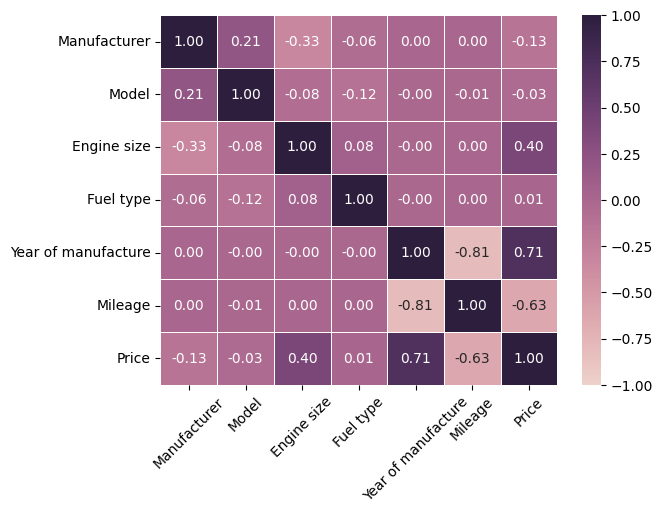

In [6]:

corr_matrix = df_copy.corr() # Matriz de correlación

# Visualización da matriz de correlación
ax = sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, fmt=".2f", linewidth=0.5, cmap= sns.cubehelix_palette(as_cmap=True))
# annot --> para ver os valores na matriz
# fmt --> para controlar o formato dos valores na matriz
# cmap --> para cambiar o mapa de cores
# linewidth --> para o grosor da separación entre celas 
# vmax e vmin --> para controlar o rango de valores nos que se van a mapear ás cores

ax.xaxis.set_tick_params(rotation=45) #rota os nomes das columnas

Vemos que hai dúas variables moi correlacionadas co prezo i entre si:
* **Mileage**
* **Year of manufacture**

1. O motivo da súa relación mútua é evidente: *Canto máis vello o coche, máis probable é que recorrera máis km*.
2. O motivo da súa relación co prezo tamén é evidente: *Canto máis usado o coche, menos interés hai na súa compra*.


! Pode ser que teñamos que ter coidado con estas dúas variables, non queremos que estas pesen moito máis que as demais no custo do coche.

## Visualización

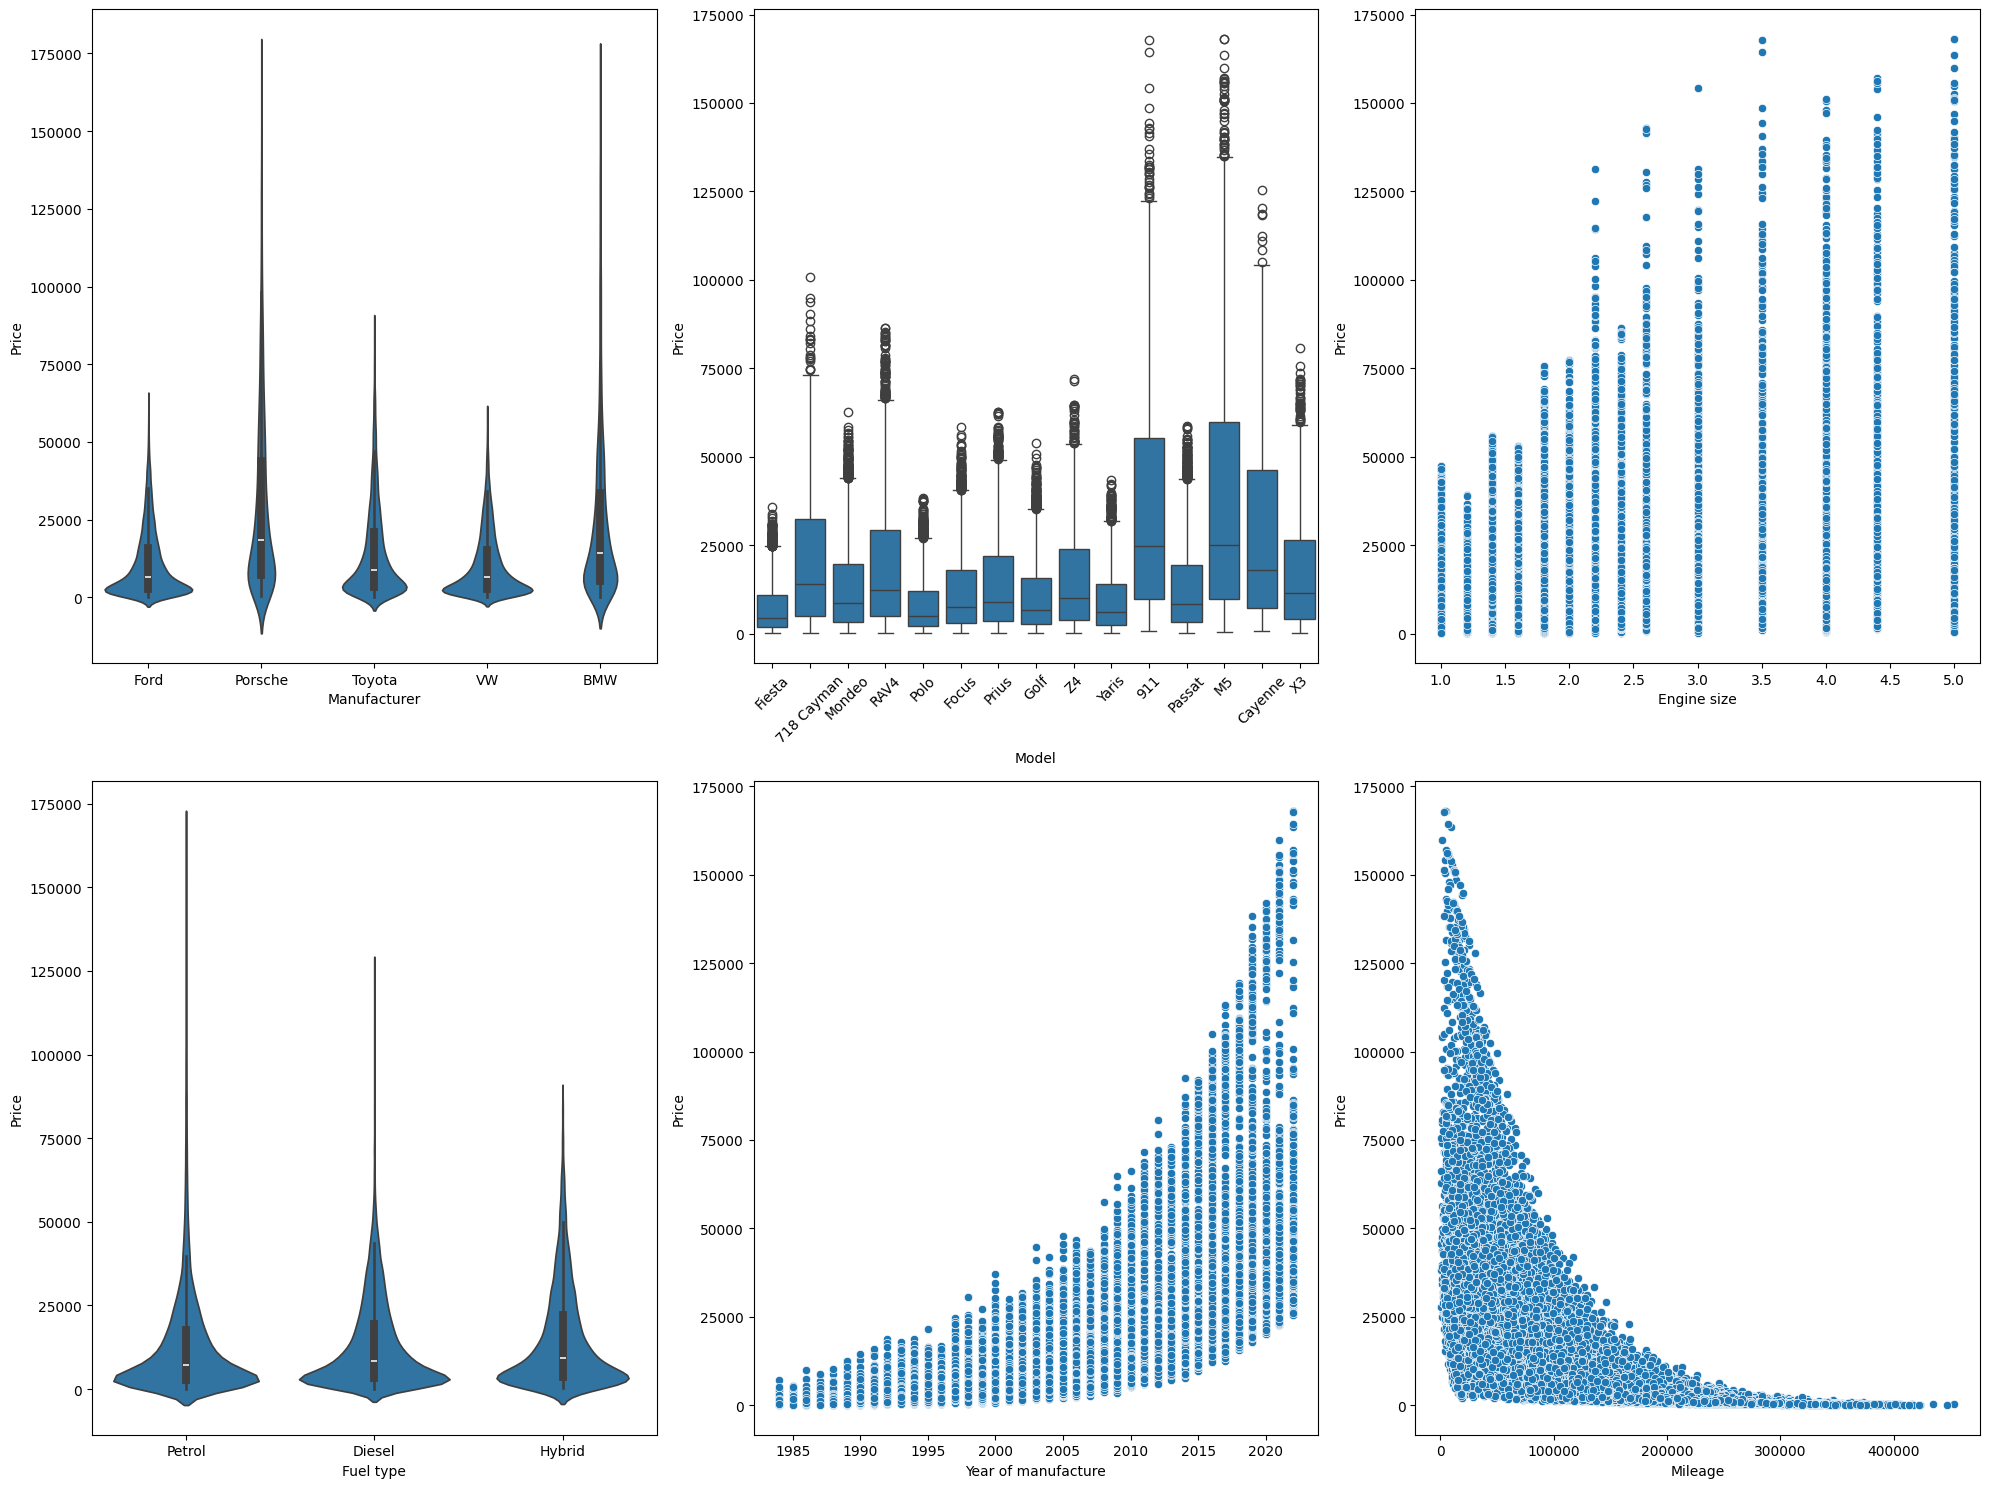

In [7]:
# Ploteo un gráfico de cada variable con respecto ao prezo 
fig, axs = plt.subplots(2, 3, figsize= (20, 15))

sns.violinplot(data=df, x= "Manufacturer", y="Price", ax = axs[0, 0])
sns.boxplot(data=df, x= "Model", y="Price", ax = axs[0, 1])
sns.scatterplot(data=df, x="Engine size", y="Price", ax = axs[0, 2])
sns.violinplot(data=df, x="Fuel type", y="Price", ax = axs[1, 0])
sns.scatterplot(data=df, x="Year of manufacture", y="Price", ax = axs[1, 1])
sns.scatterplot(data=df, x="Mileage", y="Price", ax = axs[1, 2])

axs[0,1].xaxis.set_tick_params(rotation=45)

fig.tight_layout()

## Preparación dos datos

Non uso a variable "Model"

In [8]:
#Elixo as variables a estudar
vars = ["Manufacturer", "Fuel type", "Engine size", "Year of manufacture", "Mileage"] # Variables independentes
obj = "Price" # Variable obxectivo

# Cambio o formato dos datos
# DataFrame --> array
print( "Antes do cambio de formato: " ); print( " df -> ", type(df) , df.shape ); print("")  
x = df[vars].values
y = df[obj].values.reshape(-1, 1) # Necesito facer o reshape (ten que ser unha matriz 2D, non un vector)

# -- Varios printeos para facer comprobacións --
print( "Despois do cambio de formato: " ); print( " x --> ",type(x), x.shape,"\n y --> ", type(y) , y.shape)
print("\nPrimeira fila de x: ", x[0]) ; print("Tipo de datos de x: ", [type(x[0,i]) for i in range(x.shape[1])] )


Antes do cambio de formato: 
 df ->  <class 'pandas.core.frame.DataFrame'> (50000, 7)

Despois do cambio de formato: 
 x -->  <class 'numpy.ndarray'> (50000, 5) 
 y -->  <class 'numpy.ndarray'> (50000, 1)

Primeira fila de x:  ['Ford' 'Petrol' 1.0 2002 127300]
Tipo de datos de x:  [<class 'str'>, <class 'str'>, <class 'float'>, <class 'int'>, <class 'int'>]


|É necesario transformar os datos de formato *string* a formato numérico|
|-|

O modelo que queremos adestrar non trata con datos categóricos

In [9]:
from sklearn import preprocessing

# Encodificador para a variable "Manufacturer"
le_Manufacturer = preprocessing.LabelEncoder() 
le_Manufacturer.fit( df["Manufacturer"].unique() ) # .unique() --> devolve unha lista con todos os posibles valores da variable (úsase nun pandas.Series)
x[:,0] = le_Manufacturer.transform( x[:,0] ) # .transform() --> transforma os valores da variable segundo o encodificador axustado con .fit()

# Encodificador para a variable "Fuel type"
le_FuelType = preprocessing.LabelEncoder() 
le_FuelType.fit( df["Fuel type"].unique() )
x[:,1] = le_FuelType.transform( x[:,1] )

print("\nPrimeira fila de x: ", x[0]) ; print("Tipo de datos de x: ", [type(x[0,i]) for i in range(x.shape[1])] )



Primeira fila de x:  [1 2 1.0 2002 127300]
Tipo de datos de x:  [<class 'int'>, <class 'int'>, <class 'float'>, <class 'int'>, <class 'int'>]



É necesario importar a class `MinMaxScaler` para normalizar os datos

*O adestramento é máis fiable con datos normalizados*

In [10]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

In [11]:
# Divido os datos en datos de adestramento e datos de testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200 )

# -- Varios printeos para facer comprobacións --
print( x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(40000, 5) (10000, 5) (40000, 1) (10000, 1)


## Preparación e adestramento do modelo

In [12]:
"""
from sklearn.tree import DecisionTreeRegressor

# Defino o modelo a adestrar como un Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=11)

# Adestro o modelo cos datos de adestramento
model.fit( x_train, y_train )
"""

'\nfrom sklearn.tree import DecisionTreeRegressor\n\n# Defino o modelo a adestrar como un Decision Tree Regressor\nmodel = DecisionTreeRegressor(max_depth=11)\n\n# Adestro o modelo cos datos de adestramento\nmodel.fit( x_train, y_train )\n'

In [13]:
# -- IGNORE --
"""
from sklearn.tree import export_graphviz
print(export_graphviz(model))
"""

'\nfrom sklearn.tree import export_graphviz\nprint(export_graphviz(model))\n'

In [14]:
# -- IGNORE --
"""
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=vars, rounded=True)
plt.show()
"""

'\nfrom sklearn.tree import plot_tree\nplt.figure(figsize=(20,10))\nplot_tree(model, filled=True, feature_names=vars, rounded=True)\nplt.show()\n'

## Testeo do modelo
Predí ben os prezos?

In [15]:
"""
from sklearn.metrics import r2_score
# -- Predición --
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

# -- Invertindo a normalización --

y_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1,1))
y_test = y_scaler.inverse_transform(y_test)

y_train_pred = y_scaler.inverse_transform(y_train_pred.reshape(-1,1))
y_train = y_scaler.inverse_transform(y_train)

# -- Calculando o R2 --
r2_test = r2_score( y_test, y_test_pred )
r2_train = r2_score( y_train, y_train_pred )

print( "R2_test: ", r2_test, "\nR2_train:", r2_train )
"""

'\nfrom sklearn.metrics import r2_score\n# -- Predición --\ny_test_pred = model.predict(x_test)\ny_train_pred = model.predict(x_train)\n\n# -- Invertindo a normalización --\n\ny_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1,1))\ny_test = y_scaler.inverse_transform(y_test)\n\ny_train_pred = y_scaler.inverse_transform(y_train_pred.reshape(-1,1))\ny_train = y_scaler.inverse_transform(y_train)\n\n# -- Calculando o R2 --\nr2_test = r2_score( y_test, y_test_pred )\nr2_train = r2_score( y_train, y_train_pred )\n\nprint( "R2_test: ", r2_test, "\nR2_train:", r2_train )\n'

Cela de proba

In [16]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# -- Xeramos os obxetos onde almacenaremos os modelos e as análises --

# DataFrame para almacenar os R²
r2 = pd.DataFrame({
    "Max Depth": np.arange(5,20,1),
    "R² train": None,
    "R² test": None,
})
# Diccionario para almacenar os modelos
models = {}
for depth in r2["Max Depth"]:
    models[depth] = DecisionTreeRegressor(max_depth=depth)

# -- Bucle, iteración de depths --
for depth, model in models.items():

    # Facemos unha copia dos datos para non modificar os orixinais
    x_train_copy = x_train.copy()
    x_test_copy = x_test.copy()
    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()

    # Adestramos o modelo cos datos de adestramento
    model.fit( x_train_copy, y_train_copy )
    y_test_pred = model.predict(x_test_copy)
    y_train_pred = model.predict(x_train_copy)

    # Invertimos a normalización
    y_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1,1))
    y_test_copy = y_scaler.inverse_transform(y_test_copy)
    y_train_pred = y_scaler.inverse_transform(y_train_pred.reshape(-1,1))
    y_train_copy = y_scaler.inverse_transform(y_train_copy)

    # Calculamos o R² e gardámolo no DataFrame
    r2.loc[r2["Max Depth"]==depth, "R² test"] = r2_score( y_test_copy, y_test_pred )
    r2.loc[r2["Max Depth"]==depth, "R² train"] = r2_score( y_train_copy, y_train_pred )

# Poñemos a columna "Max Depth" como índice do DataFrame
r2.set_index("Max Depth", inplace=True)

print(r2)


           R² train   R² test
Max Depth                    
5          0.904041  0.904851
6          0.932579  0.931056
7          0.952222  0.948717
8          0.966003  0.961608
9          0.976357  0.967818
10         0.982411  0.973099
11         0.987223  0.975513
12         0.990368  0.975791
13          0.99284  0.975697
14         0.995049  0.975589
15         0.996609  0.972835
16         0.997869  0.971996
17         0.998695  0.971223
18         0.999217  0.970663
19         0.999547  0.970764


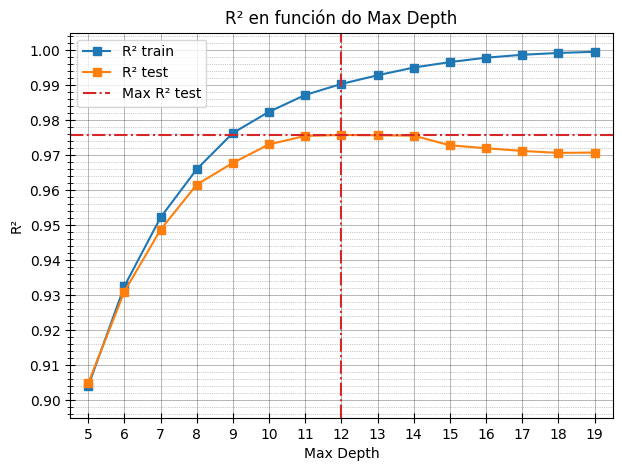

In [73]:
# Ploteamos os R²
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,5))

ax.plot(r2.index.values, r2["R² train"], marker='s',linestyle="-", label="R² train")
ax.plot(r2.index.values, r2["R² test"], marker='s', label="R² test")
ax.axhline(y = max(r2["R² test"].values), color="C3", linestyle="-.",  label="Max R² test")
ax.axvline(x = r2["R² test"].idxmax(), color="C3", linestyle="-.")


ax.set_xlabel("Max Depth"); plt.ylabel("R²")
ax.set_title("R² en función do Max Depth")
ax.set_xlim(r2.index.values[0]-.5, r2.index.values[-1]+.5)
ax.set_ylim(0.895,1.005)

ax.minorticks_on()
ax.tick_params(axis="x", which="minor",length=0, labelbottom=False)
ax.tick_params(axis="y", which="minor",length=4, direction="inout")
ax.tick_params(axis="both", which="major",length=7, direction="inout")
ax.set_xticks(r2.index.values); ax.set_yticks(np.arange(0.9,1.01,0.01))
ax.grid(axis="both", which="major", linestyle='-', linewidth='0.5', color='black', alpha=0.4)
ax.grid(axis="y", which="minor", linestyle=':', linewidth='0.5', color='black', alpha=0.4)
plt.legend()